<a href="https://colab.research.google.com/github/rajan-dhinoja/Machine_Learning/blob/main/Part-3%20-%20Classification/Section%2017%20-%20Kernel%20SVM/kernel_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Kernel SVM Tutorial...**

# ***Step-A: Data Preprocessing:-***

## Step-1: Import Required Dependencies:-
Import essential libraries and modules for data manipulation, visualization, and preprocessing...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Set the option to prevent silent downcasting
np.set_printoptions(formatter={'float': '{:,.2f}'.format}, suppress=True, precision=2)
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('future.no_silent_downcasting', True)

## Step-2: Load the Dataset and Display Different overviews of Datasets:-

In [2]:
# dataset = pd.DataFrame(pd.read_csv('social_network_ads.csv'))
dataset = pd.DataFrame(pd.read_csv('classification_data.csv'))

dataset.head()
# dataset

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
# Seperate the whole datset into categorical and numerical columns...

categorical_cols = dataset.select_dtypes(include=['object']).columns
numerical_cols = dataset.select_dtypes(exclude=['object']).columns

if categorical_cols.empty:
  print("> No Categorical Columns Found... \n")
else:
  print("-> Categorical Columns: \n", categorical_cols, "\n")

if numerical_cols.empty:
  print("> No Numerical Columns Found...")
else:
  print("-> Numerical Columns: \n", numerical_cols)

> No Categorical Columns Found... 

-> Numerical Columns: 
 Index(['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')


In [4]:
print("> Shape of the Dataset: \n", dataset.shape, "\n")
print("> Information about Dataset:")
print(dataset.info(), "\n")
print("> Statistical summary of the Dataset:")
print(dataset.describe().map(lambda x: round(x, 4)))

> Shape of the Dataset: 
 (683, 11) 

> Information about Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB
None 

> Statistical summary of the Dataset:
       Sample c

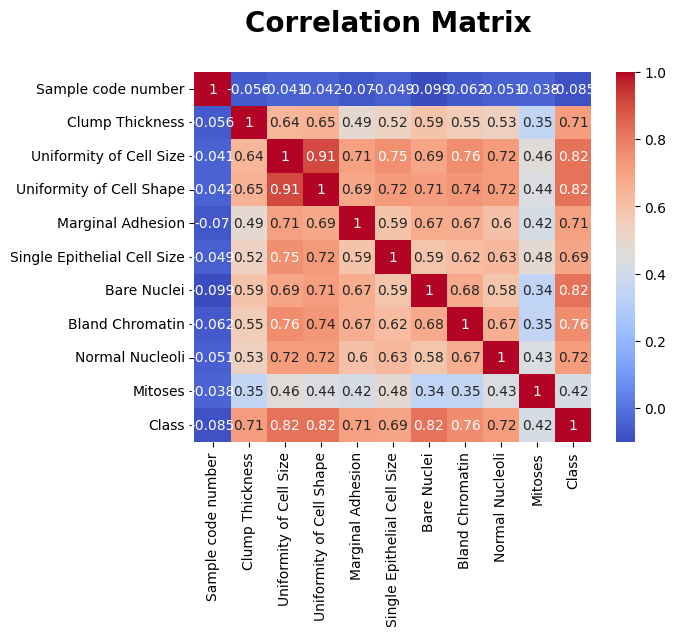

In [5]:
# Correlation Matrix Heatmap
sns.heatmap(dataset[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix \n',fontsize=20,  fontweight=800)
plt.show()

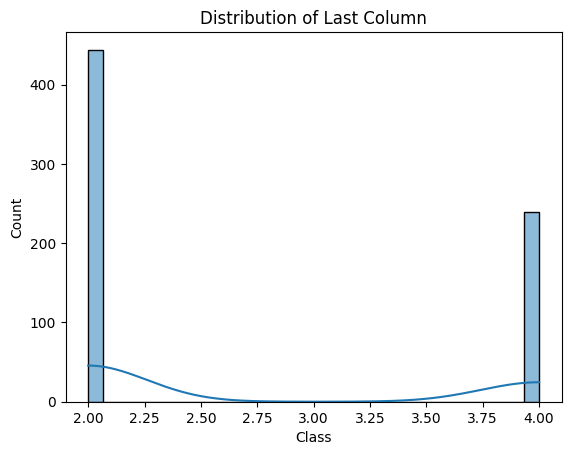

In [6]:
# Plot target distribution
sns.histplot(dataset.iloc[:, -1], bins=30, kde=True)
plt.title('Distribution of Last Column')
plt.show()

## Step-3:- Checking the Dataset:-

### Step-3.1: Checking any Duplicate Data and Handling them:-

In [7]:
# if dataset.duplicated().any():
#   dataset.drop_duplicates(inplace=True)
#   print("Duplicate Data(or Identical Rows) found and Removed...")
# else:
#     print("No Duplicate Data(or Identical Rows) found...")

### Step-3.2: Cheking any Missing Data and Handling them:-

In [8]:
# Here from the module named impute of the library scikit-learn, we are using the SimpleImputer Class to Handle the Missing Values.
from sklearn.impute import SimpleImputer

missing_data_counts = dataset.isnull().sum() + dataset.isin(['', 'N/A', 'Unknown', 'NaN']).sum()

# if dataset.isnull().values.any() or dataset.isin(['', 'NaN', 'N/A', 'Unknown']).any().any():
if missing_data_counts.any():

  categorical_missing_counts = dataset[categorical_cols].isnull().sum() + dataset[categorical_cols].isin(['', 'N/A', 'Unknown', 'NaN']).sum()
  numerical_missing_counts = dataset[numerical_cols].isnull().sum()

  # Replace "Unknown" with NaN in categorical columns
  for col in categorical_cols:
    dataset[col] = dataset[col].replace('Unknown', np.nan)


  # Check if there are any missing values (categorical or numerical)
  if categorical_missing_counts.any() or numerical_missing_counts.any():
      # Print missing counts for categorical columns in the desired format
      print("Missing Data Counts in Categorical Columns: \n", categorical_missing_counts)
      print("\n")
      print("Missing Data Counts in Numerical Columns: \n", numerical_missing_counts)

      # Create imputers for categorical and numerical features
      categorical_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
      numerical_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

      # Apply imputers to the selected columns in X
      if len(categorical_cols) > 0:
        categorical_cols_for_impution = [col for col in categorical_cols if col != dataset.columns[-1]]
        dataset[categorical_cols_for_impution] = categorical_imputer.fit_transform(dataset[categorical_cols_for_impution])

      # Exclude the dependent variable column (last column) if it's numerical
      numerical_cols_for_impution = [col for col in numerical_cols if col != dataset.columns[-1]]
      if len(numerical_cols_for_impution) > 0:
          dataset[numerical_cols_for_impution] = numerical_imputer.fit_transform(dataset[numerical_cols_for_impution])
      # if len(numerical_cols) > 0:
          # dataset[numerical_cols] = numerical_imputer.fit_transform(dataset[numerical_cols])

      print("\n")
      print("New Data with replaced missing values: \n", dataset)
else:
    print("No missing data found.")



No missing data found.


### Step-3.3: Checking any Synonyms or Aliases and Handling them:-

In [9]:
for col in dataset.columns:
  # Get value counts and convert to DataFrame with column name
  # .reset_index(name='Counts: '): This converts the Series into a DataFrame and names the count column as 'Counts: '.
  value_counts_dataset = dataset[col].value_counts().rename_axis('Unique Values: ').reset_index(name='Counts: ')

  # Transpose and print with formatting
  print(f"Column: \t'{col}'")
  # .to_string(header=False): This converts the transposed DataFrame to a string for printing and removes the header row.
  print(value_counts_dataset.T.to_string(header=False), "\n")


Column: 	'Sample code number'
Unique Values:   1182404  1276091  1198641  897471  1168736  411453  734111  1293439  560680  1143978  320675  1277792  1116192  1116116  1115293  704097  1105524  385103  1173347  1171710  1339781  1174057  1299596  695091  1238777  1321942  1240603  1218860  1061990  1299924  769612  1212422  1100524  1158247  1320077  1017023  1354840  1033078  1070935  798429  493452  466906  822829  654546  1114570  1280258  1277145  474162  1318169  1302428  1259008  1301945  1299161  1296593  1266124  1296263  1296025  1287282  342245  1293966  1267898  1269574  1257608  428598  787451  492561  1181685  521441  1268313  1298416  1268804  1296572  1211594  1073960  1002025  1297522  1268766  897172  1277268  1286943  1295508  1297327  1298360  1070522  896404  1299994  888523  1304595  1306282  1313325  1265899  1253917  95719  1238186  160296  1224565  1217952  1204558  1181567  1170945  1155967  1142706  1133991  1119189  1084139  1076352  1257470  636437  1131411 

### Step-3.4: Checking any Categorical Data and Encoding them:-

In [10]:
# `sklearn.compose` is a module in scikit-learn (a popular Python machine learning library) used for combining different data transformations.
# sklearn.preprocessing is a module within scikit-learn that provides tools for preparing your data for machine learning algorithms.
# LabelEncoder is a specific class designed to convert categorical labels (like 'France', 'Spain', 'Germany') into numerical labels (like 0, 1, 2).
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1].values

repeating_cols = []
if categorical_cols.empty:
  print("> No Categorical Columns Found... \n")
else:
  for col in categorical_cols:
      # Matrix of Feature
      if col != dataset.columns[-1]:
        print(f"> String Values present in Column '{col}'.")
        # Check for repeating values within the categorical column
        value_counts = dataset[col].value_counts()
        repeating_values = value_counts[value_counts > 1].index.tolist()
        if repeating_values:
          repeating_cols.append(col)
          print(f"\t- Also, Categorical values found in column '{col}': {repeating_values}.\n")

          print("Repeating Columns in Matrix of Features(X): ", repeating_cols, "\n")
          if repeating_cols:
            encoder = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), repeating_cols)], remainder='passthrough')
            X = np.array(encoder.fit_transform(X))
            print(f"\t-'{col}' is Encoded Successfully...\n")
        else:
          print(f"\t- But No Categorical values found in column '{col}'.\n")



      # Dependent Variable/Output
      if col == dataset.columns[-1]:
        print(f"> String Values present in Column '{col}'(Output Column).")
        # Check for repeating values within the categorical column
        value_counts = dataset[col].value_counts()
        repeating_values = value_counts[value_counts > 1].index.tolist()
        if repeating_values:
          print(f"\t- Also, Categorical values found in column '{col}': {repeating_values}")
          le = LabelEncoder()
          y = le.fit_transform(dataset[col])
          print(f"\t-'{col}' is Encoded Successfully...\n")
        else:
          print(f"\t- But No Categorical values found in column '{col}'.\n")


print("Matrix of Features(X): \n", X)
print("\n")
print("Dependent Variable(y): \n", y)


> No Categorical Columns Found... 

Matrix of Features(X): 
      Sample code number  Clump Thickness  Uniformity of Cell Size  \
0               1000025                5                        1   
1               1002945                5                        4   
2               1015425                3                        1   
3               1016277                6                        8   
4               1017023                4                        1   
..                  ...              ...                      ...   
678              776715                3                        1   
679              841769                2                        1   
680              888820                5                       10   
681              897471                4                        8   
682              897471                4                        8   

     Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                           1

## Step-4: Split the Dataset into the Training set and Test set:-

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print("-> Matrix of Features(X):- \n", pd.DataFrame(X).head())
# print(pd.DataFrame(X).head().to_string())
print("\n")

print("-> Printing Training Sets: ")
print("> X_train: \n", X_train)
print("> X_test: \n", X_test)
print("\n")

print("-> Printing Test Sets:")
print("> y_train: \n", y_train)
print("> y_test: \n", y_test)

-> Matrix of Features(X):- 
    Sample code number  Clump Thickness  Uniformity of Cell Size  \
0             1000025                5                        1   
1             1002945                5                        4   
2             1015425                3                        1   
3             1016277                6                        8   
4             1017023                4                        1   

   Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                         1                  1                            2   
1                         4                  5                            7   
2                         1                  1                            2   
3                         8                  1                            3   
4                         1                  3                            2   

   Bare Nuclei  Bland Chromatin  Normal Nucleoli  Mitoses  
0            1                3  

## Step-5: Feature Scaling:-

In [12]:
""" Here we are not applying Feature Scaling in Dependent Variable (y), because there are only 0 and 1 values in y """
# StandardScaler class from scikit-learn, which is a tool for standardization and Normalization.
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print("Printing Training Sets after Feature Scaling:")
print("> X_train: \n", X_train)
print("\n")
print("Printing Test Sets after Feature Scaling:")
print("> X_test: \n", X_test)

Printing Training Sets after Feature Scaling:
> X_train: 
 [[-1.38 0.92 0.94 ... 2.23 2.27 0.25]
 [0.03 1.28 -0.04 ... 1.82 1.95 3.75]
 [0.23 1.28 2.25 ... 2.63 2.27 -0.34]
 ...
 [0.17 -1.22 -0.70 ... -0.99 -0.62 -0.34]
 [0.30 -0.51 -0.70 ... -0.59 -0.62 -0.34]
 [-1.04 1.99 1.92 ... 1.42 1.31 -0.34]]


Printing Test Sets after Feature Scaling:
> X_test: 
 [[0.11 -1.22 -0.70 ... -0.99 -0.62 -0.34]
 [0.09 -0.51 -0.70 ... -0.59 -0.62 -0.34]
 [-0.57 0.21 0.61 ... 0.22 0.02 -0.34]
 ...
 [-0.48 0.21 -0.70 ... -0.18 -0.62 0.25]
 [0.06 -0.86 -0.37 ... 1.42 -0.62 -0.34]
 [0.09 -0.86 -0.70 ... -0.18 -0.62 -0.34]]


# ***Step-B: Model Building:-***

## Step-1: Training the Kernel SVM model on the Training set

In [13]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

## Step-2: Predicting a new result

In [14]:
# print(classifier.predict(sc.transform([[30, 87000]])))

## Predicting the Test set results

In [15]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 4]
 [4 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]

## Making the Confusion Matrix

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", cm)
print("\n")
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Confusion Matrix: 
 [[102   5]
 [  3  61]]


Accuracy Score:  0.9532163742690059


## Visualising the Training set results

In [17]:
# from matplotlib.colors import ListedColormap
# X_set, y_set = sc.inverse_transform(X_train), y_train
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
#                      np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
# plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('salmon', 'dodgerblue')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)
# # plt.title('Kernel SVM (Training set)')
# # plt.xlabel('Age')
# # plt.ylabel('Estimated Salary')
# # plt.legend()
# # plt.show()

## Visualising the Test set results

In [18]:
# from matplotlib.colors import ListedColormap
# X_set, y_set = sc.inverse_transform(X_test), y_test
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
#                      np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
# plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('salmon', 'dodgerblue')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)
# plt.title('Kernel SVM (Test set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()